# TP2: Sac de Mots, TF-IDF, Distance Cosine

**M1 Informatique - Introduction au Traitement Automatique des Langues**

L'objectif de ce TP est d'étudier la représentation d'un document sous la forme d'un *sac de mots* (*Bag Of Word - BOW*) avec un modèle vectoriel. Nous verrons deux types de pondération : la **pondération par la fréquence normalisée des termes** (*Term Frequency - TF*) et celles par la **fréquence inverse dans les documents** (*Inverse Document Frequency - IDF*). Enfin nous utiliserons ces représentations sur une tâche de classification thématique de documents grâce à la similarité Cosine entre les vecteurs pondérés de documents.

## 1 Représentation vectorielle en Sac de Mots

### 1.1 Tableau document/terme

Soit un ensemble de documents textuels D = d₁, d₂, ..., dₙ, la **représentation vectorielle** de type **sac de mots** consiste à traduire la collection de documents en un tableau de données attributs-valeurs, où chaque document est une ligne du tableau, et chaque mot une colonne. Par exemple, soit un ensemble de 4 documents contenant des suites de mots, représentés par le code identifiant de chaque mot, sur un lexique de 10 mots.

| D | t₁ | t₂ | t₃ | t₄ | t₅ | t₆ | t₇ | t₈ | t₉ | t₁₀ |
|---|---|---|---|---|---|---|---|---|---|-----|
| d₁ | w₁,₁ | w₁,₂ | w₁,₃ | w₁,₄ | w₁,₅ | w₁,₆ | w₁,₇ | w₁,₈ | w₁,₉ | w₁,₁₀ |
| d₂ | w₂,₁ | w₂,₂ | w₂,₃ | w₂,₄ | w₂,₅ | w₂,₆ | w₂,₇ | w₂,₈ | w₂,₉ | w₂,₁₀ |
| d₃ | w₃,₁ | w₃,₂ | w₃,₃ | w₃,₄ | w₃,₅ | w₃,₆ | w₃,₇ | w₃,₈ | w₃,₉ | w₃,₁₀ |
| d₄ | w₄,₁ | w₄,₂ | w₄,₃ | w₄,₄ | w₄,₅ | w₄,₆ | w₄,₇ | w₄,₈ | w₄,₉ | w₄,₁₀ |

Comme on peut le voir, **chaque document est représenté par un vecteur** (une ligne de la matrice), la taille du vecteur correspondant au lexique choisi pour filtrer l'ensemble des documents de la collection. Le choix du lexique est donc crucial : plus le lexique est grand, meilleure sera la couverture lexicale du modèle vis à vis de chaque document, mais cela entraîne une taille de vecteur importante, avec de nombreuses valeurs à zéro, et étant donné la loi de Zipf, de nombreux mots sont présents dans tous les documents et donc ne sont pas discriminants pour caractériser un thème. En général il faut trouver un compromis entre la couverture du lexique (la meilleure possible) et la taille des vecteurs (les plus petits possibles).

### 1.2 Pondération

Chaque case $w_{i,j}$ peut contenir différentes valeurs appelées *pondérations* des mots des documents. Voici trois exemples de pondération simple, pour un ensemble de N documents sur un lexique de V mots :

- pondération booléenne : $w_{i,j}$ = 1 si le mot t_j est présent dans le document $d_i$, sinon la valeur est 0.
- pondération par fréquence : $w_{i,j}$ = C(i, j) où C(i, j) est le nombre de fois où le mot $t_j$ apparaît dans le document $d_i$.
- pondération par fréquence normalisée (TF - Term Frequency) :

$$w_{i,j} = tf(d_i, t_j) = \frac{C(i, j)}{\sum_{0<k<V} C(i, k)}$$

Le critère tf(i,j) va favoriser les termes très fréquents. Or, comme nous l'avons vu en étudiant la loi de Zipf, un terme présent dans presque tout le corpus (D) ne représente pas un événement significatif pour caractériser un document en particulier. A l'inverse un terme plus rare mais n'apparaissant que dans un petit nombre de document peut être beaucoup plus pertinent.

Le critère **IDF** pour *Inverse document frequency* permet de prendre en compte ce facteur.
Il se calcule de la manière suivante :

$$idf(t, D) = \log_{10}(\frac{N}{1 + n_t})$$

La quantité n_t représente le nombre de documents de D où le terme t est présent. On lui ajoute 1 pour éviter les valeurs nulles.

La quantité idf aura une valeur proche de 0 lorsqu'un mot est présent dans tous les documents (par exemple les mots outils tels que les articles ou les prépositions), et une valeur plus importante si le mot apparaît dans peu de documents.

Cette pondération idf s'utilise en combinaison avec la pondération tf, de la manière suivante :

$$w_{i,j} = tf\text{-}idf(d_i, t_j) = tf(d_i, t_j) \times idf(t_j, D)$$

## 2 Mesures de similarité

### 2.1 Similarité Cosine

Cette représentation vectorielle des documents permet de calculer facilement des mesures de similarité entre documents, en estimant des distances entre les vecteurs (les lignes de la matrice). Une des distances les plus utilisées utilise la mesure du Cosinus entre les vecteurs. L'idée de base est que plus l'angle est important entre deux vecteurs représentant les documents d₁ et d₂, plus le contenu de d₁ et d₂ est éloigné.

La figure ci-dessous illustre cette idée en présentant 3 vecteurs : 2 vecteurs de documents (d₁ et d₂) et 1 vecteur de requête (q). Si l'angle entre q et d₁ est plus faible qu'entre q et d₂, alors la requête q est plus proche du document d₁.

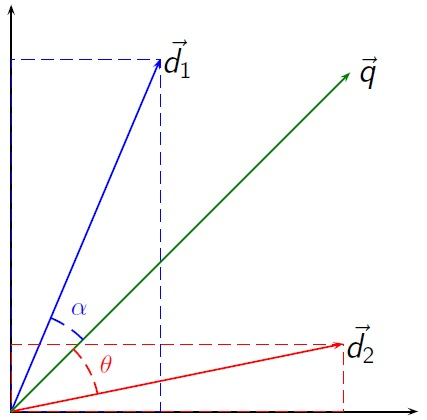

Similarité cosinus entre vecteurs

Pour calculer cet angle, on peut utiliser le produit scalaire des vecteurs de la manière suivante :

$$d_1 \cdot d_2 = ||d_1||||d_2||\cos(d_1, d_2) \Rightarrow \cos(d_1, d_2) = \frac{d_1 \cdot d_2}{||d_1||||d_2||}$$

avec :

$$||d_i|| = \sqrt{\sum_{0<k<V} (w_{i,k})^2}$$

et

$$d_1 \cdot d_2 = \sum_{0<k<V} w_{1,k} \times w_{2,k}$$

Pour déduire une distance dist(d₁, d₂) à partir de la similarité cosinus cos(d₁, d₂), il suffit de faire :

$$dist(d_1, d_2) = 1 - \cos(d_1, d_2) \text{ avec } 0 \leq dist(d_1, d_2) \leq 1$$

### 2.2 Utilisation : classification thématique

Calculer des distances entre des documents grâce à des mesures telles que dist permet, par exemple, de réaliser simplement des systèmes de classification thématique de documents.

Supposons que la collection de documents D soit partitionnée en K thèmes T₁, T₂, ..., Tₖ, par exemple : thèmes={politique, sport, justice, économie,...}.

Chaque thème Tᵢ est représenté par un ensemble de documents de D, appelé le corpus d'apprentissage Cᵢ du thème Tᵢ sur D.

On commence par faire l'union de tous les mots de D pour obtenir le lexique L qui représente l'espace lexical dans lequel chaque document sera projeté.

En construisant un vecteur de poids V sur cet espace L (avec une pondération booléenne, en fréquence tf ou avec le critère tfidf) pour chaque corpus Cᵢ, on obtient un modèle V(Cᵢ, L) représentant le vecteur de poids pour chaque thème Tᵢ dans l'espace L.

On peut ensuite réduire cet espace en sélectionnant uniquement les n mots ayant les pondérations les plus fortes (selon le critère choisi), afin de réduire la taille du modèle en ne gardant que les dimensions les plus représentatives, au sens de la pondération choisie. On obtient ainsi un espace lexical réduit Lⁿ et les vecteurs thématiques associés : V(Cᵢ, Lⁿ)

Lorsqu'on veut classer un nouveau document d entre les différents thèmes de D, il faut tout d'abord le projeter dans l'espace Lⁿ en calculant les pondérations des mots de d et en remplissant un vecteur V(d, Lⁿ) pour tous les mots de Lⁿ (les mots de Lⁿ ne se trouvant pas dans d ont des pondérations à 0), puis on trouve le modèle V(Cᵢ, Lⁿ) dont la distance avec V(d, Lⁿ) est minimale :

$$\hat{i} = \arg\min_i dist(V(d, L^n), V(C_i, L^n))$$

| Thème | t₁ | t₂ | t₃ | t₄ | t₅ | t₆ | t₇ | t₈ | t₉ | t₁₀ |
|--------|---|---|---|---|---|---|---|---|---|-----|
| Ctrain(Politique) | w₁,₁ | w₁,₂ | w₁,₃ | w₁,₄ | w₁,₅ | w₁,₆ | w₁,₇ | w₁,₈ | w₁,₉ | w₁,₁₀ |
| Ctrain(Sport) | w₂,₁ | w₂,₂ | w₂,₃ | w₂,₄ | w₂,₅ | w₂,₆ | w₂,₇ | w₂,₈ | w₂,₉ | w₂,₁₀ |
| Ctrain(Justice) | w₃,₁ | w₃,₂ | w₃,₃ | w₃,₄ | w₃,₅ | w₃,₆ | w₃,₇ | w₃,₈ | w₃,₉ | w₃,₁₀ |
| Ctrain(Economie) | w₄,₁ | w₄,₂ | w₄,₃ | w₄,₄ | w₄,₅ | w₄,₆ | w₄,₇ | w₄,₈ | w₄,₉ | w₄,₁₀ |
| document d | w₅,₁ | w₅,₂ | w₅,₃ | w₅,₄ | w₅,₅ | w₅,₆ | w₅,₇ | w₅,₈ | w₅,₉ | w₅,₁₀ |

## 3 Travail à faire

Dans ce TP vous allez manipuler les mêmes données (corpus_topic) provenant de dépêches de presse que dans le TP précédent. Vous pouvez utiliser vos programmes et les données tokenisées du TP précédent, vous pouvez aussi récupérer les données déjà tokenisées, avec 1 fichier train tokenisé pour chaque thème ici :
https://pageperso.lis-lab.fr/frederic.bechet/M1_TAL/TP2_data.tar.gz

Dans cette archive vous trouverez aussi le corpus de test au format JSON sous la forme d'une liste où chaque élément est un triplet contenant le nom du fichier source du document (filename), son label thématique (label), et le texte tokenisé sous forme de code (content).

Vous allez faire dans les exercices suivants des expériences en essayant différentes pondérations (booléenne, tf, tf-idf) et différentes tailles de lexique pour faire un système simple de classification thématique de document. Le but est de calculer, pour un nouveau document, une distance par rapport aux 4 modèles thématiques afin de déterminer le thème le plus proche.

### 3.1 Question 1 - vecteurs de poids booléen et fréquentiels

Écrire un programme qui prend en entrée les données d'apprentissage des 4 thèmes CLT, ECO, INT et SPO, et qui produit des vecteurs de poids, pour les pondérations booléenne et tf, pour chaque thème sur le lexique L contenant l'union des lexiques des corpus d'apprentissage. Affichez les 20 mots ayant les pondérations les plus fortes pour le poids tf pour chaque thème. Que constatez vous ?

In [30]:
import os
import re

themes = ['CLT', 'ECO', 'INT', 'SPO']
parent_path = '/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic'

def union():
    lexique = set()

    for theme in themes:
        train_path = os.path.join(parent_path, theme, "train") 
        
        if not os.path.isdir(train_path):  
            print(f"Erreur : Le dossier '{train_path}' est introuvable.")
            continue

        for fichier in os.listdir(train_path):  
            if fichier.endswith(".tok"):  
                fichier_path = os.path.join(train_path, fichier)
                
                try:
                    with open(fichier_path, "r", encoding="utf-8") as f:
                        texte = f.read().lower()
                        mots = re.findall(r'\b\w+\b', texte)
                        lexique.update(mots)  
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier '{fichier_path}': {e}")

    return lexique

lexique = union()
print(f"Le lexique contient {len(lexique)} mots uniques.")
lexique


Le lexique contient 15962 mots uniques.


{'13016',
 '12345',
 '8662',
 '8568',
 '3763',
 '1052',
 '20547',
 '983',
 '25578',
 '12515',
 '74927',
 '10703',
 '6818',
 '2019',
 '12161',
 '13062',
 '5969',
 '2139',
 '64580',
 '12326',
 '1555',
 '9665',
 '4637',
 '10692',
 '27176',
 '52848',
 '47291',
 '9655',
 '18122',
 '1896',
 '4530',
 '60810',
 '20033',
 '8255',
 '11195',
 '238',
 '9008',
 '12033',
 '205',
 '8657',
 '5678',
 '36057',
 '3484',
 '42512',
 '5487',
 '13029',
 '4680',
 '4918',
 '13461',
 '7717',
 '13574',
 '5034',
 '908',
 '2960',
 '39256',
 '14226',
 '9578',
 '27686',
 '35712',
 '13589',
 '3314',
 '33802',
 '55903',
 '1398',
 '11964',
 '4167',
 '21986',
 '8585',
 '6861',
 '1526',
 '3312',
 '18663',
 '3708',
 '43260',
 '9248',
 '16861',
 '7894',
 '64993',
 '1901',
 '4785',
 '50938',
 '30102',
 '12394',
 '26528',
 '6692',
 '25410',
 '6763',
 '2938',
 '12008',
 '19578',
 '31176',
 '38283',
 '3042',
 '2194',
 '16930',
 '19357',
 '37965',
 '23230',
 '9832',
 '8745',
 '2063',
 '1195',
 '15743',
 '4269',
 '41202',
 '1881

In [33]:
import os
import re
from collections import defaultdict

themes = ['CLT', 'ECO', 'INT', 'SPO']
parent_path = '/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic'


def vector_tf(vocabulaire):
    boolean_vectors = {theme: {} for theme in themes} 
    tf_vectors = {theme: {} for theme in themes} 
    top_20_words_per_theme = {theme: defaultdict(int) for theme in themes}  
    for theme in themes:
        train_path = os.path.join(parent_path, theme, "train")

        if not os.path.isdir(train_path):
            print(f"Erreur : Le dossier '{train_path}' est introuvable.")
            continue

        for fichier in os.listdir(train_path):
            if fichier.endswith(".tok"):
                fichier_path = os.path.join(train_path, fichier)

                try:
                    with open(fichier_path, "r", encoding="utf-8") as f:
                        texte = f.read().lower()
                        mots = re.findall(r'\b\w+\b', texte)

                        bool_vector = {mot: 0 for mot in vocabulaire}
                        tf_vector = {mot: 0 for mot in vocabulaire}

                        for mot in mots:
                            if mot in vocabulaire:
                                bool_vector[mot] = 1 
                                tf_vector[mot] += 1
                        for mot in tf_vector:
                            tf_vector[mot] = tf_vector[mot] / len(mots)

                        boolean_vectors[theme][fichier] = bool_vector
                        tf_vectors[theme][fichier] = tf_vector 

                        for mot in tf_vector:
                            top_20_words_per_theme[theme][mot] += tf_vector[mot]

                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier '{fichier_path}': {e}")

    for theme in themes:
        print(f"\n### Top 20 mots pour le thème '{theme}' :")

        top_20 = sorted(top_20_words_per_theme[theme].items(), key=lambda x: x[1], reverse=True)[:20]
        for mot, tf in top_20:
            print(f"{mot}: {tf}")

    return boolean_vectors, tf_vectors


boolean_vectors, tf_vectors = vector_tf(lexique)



### Top 20 mots pour le thème 'CLT' :
0: 17.4344837450737
1: 6.706598014361724
44: 4.757585891953561
3: 3.403978171137646
2: 3.194334893753765
5: 1.7379306796139116
6: 1.6373586021123923
8: 1.4983719558716664
11: 1.4493999513863944
4: 1.4114449993637517
15: 1.2995739825576098
9: 1.2768358995771583
10: 1.246977193136432
14: 1.221069702120741
17: 1.1640715068520164
18: 1.162716493301881
12: 1.084208453702645
16: 1.0765480097415279
26: 1.0530040279968902
13: 0.9340157979726863

### Top 20 mots pour le thème 'ECO' :
0: 18.735549245897694
1: 8.046685768168345
3: 4.0382939796350765
2: 3.863824391441897
44: 2.6813404553901132
8: 2.264449753306506
5: 2.218283894584252
6: 2.1083234590774182
9: 1.9644541012891157
4: 1.7977807383229127
10: 1.7418251489080392
26: 1.5486953010603213
15: 1.5471237911758107
16: 1.536275639963923
14: 1.3564532038198627
12: 1.2943791873358925
13: 1.1693270490707577
11: 1.1215527389859858
19: 0.9924268960136597
18: 0.9414406722694645

### Top 20 mots pour le thème 'INT

### 3.2 Question 2 - pondérations tfidf

Vous allez maintenant calculer la pondération idf pour chaque mot de L en créant un nouveau vecteur de poids, puis vous allez combiner les poids tf et idf pour obtenir le vecteur de poids tfidf pour chaque thème. Affichez les 20 mots ayant les pondérations tfidf les plus fortes pour chaque thème. Que constatez vous ?

In [ ]:
import os
import math
from collections import defaultdict

def vector_tf_idf(vocabulaire):
    boolean_vectors, tf_vectors = vector_tf(vocabulaire)
    
    tfidf_vectors = {theme: {} for theme in themes}
    top_20_words_per_theme = {theme: defaultdict(float) for theme in themes}
    
    # Calcul du DF (nombre de documents contenant le mot)
    df = defaultdict(int)
    total_documents = sum(len(docs) for docs in tf_vectors.values())
    
    for theme in themes:
        for fichier, doc_tf in tf_vectors[theme].items():
            for mot, tf in doc_tf.items():
                if tf > 0:
                    df[mot] += 1
    
    idf = {}
    for mot in df:
        idf[mot] = math.log(total_documents / (df[mot] + 1e-6))  # Évite division par zéro
    
    # Calcul du TF-IDF avec moyenne par document
    for theme in themes:
        num_docs_theme = len(tf_vectors[theme])
        for fichier, doc_tf in tf_vectors[theme].items():
            tfidf_vector = {}
            for mot, tf in doc_tf.items():
                tfidf = tf * idf.get(mot, 0.0)
                tfidf_vector[mot] = tfidf
                if num_docs_theme > 0:
                    top_20_words_per_theme[theme][mot] += tfidf / num_docs_theme  # Moyenne
            tfidf_vectors[theme][fichier] = tfidf_vector
    
    # Affichage des résultats + vérification IDF
    for theme in themes:
        print(f"\n### Top 20 mots TF-IDF pour '{theme}' (moyenne) ###")
        sorted_words = sorted(top_20_words_per_theme[theme].items(), key=lambda x: x[1], reverse=True)[:20]
        for mot, score in sorted_words:
            print(f"{mot}: {score:.4f} (IDF: {idf.get(mot, 0):.2f})")  # Afficher IDF
    
    return boolean_vectors, tf_vectors, tfidf_vectors

boolean_vectors, tf_vectors, tfidf_vectors = vector_tf_idf(lexique)


### Top 20 mots pour le thème 'CLT' :
0: 17.4344837450737
1: 6.706598014361724
44: 4.757585891953561
3: 3.403978171137646
2: 3.194334893753765
5: 1.7379306796139116
6: 1.6373586021123923
8: 1.4983719558716664
11: 1.4493999513863944
4: 1.4114449993637517
15: 1.2995739825576098
9: 1.2768358995771583
10: 1.246977193136432
14: 1.221069702120741
17: 1.1640715068520164
18: 1.162716493301881
12: 1.084208453702645
16: 1.0765480097415279
26: 1.0530040279968902
13: 0.9340157979726863

### Top 20 mots pour le thème 'ECO' :
0: 18.735549245897694
1: 8.046685768168345
3: 4.0382939796350765
2: 3.863824391441897
44: 2.6813404553901132
8: 2.264449753306506
5: 2.218283894584252
6: 2.1083234590774182
9: 1.9644541012891157
4: 1.7977807383229127
10: 1.7418251489080392
26: 1.5486953010603213
15: 1.5471237911758107
16: 1.536275639963923
14: 1.3564532038198627
12: 1.2943791873358925
13: 1.1693270490707577
11: 1.1215527389859858
19: 0.9924268960136597
18: 0.9414406722694645

### Top 20 mots pour le thème 'INT

### 3.3 Question 3 - restriction du lexique

Vous allez maintenant écrire un programme permettant de réduire la taille du lexique L par rapport à une pondération donnée (par exemple tf) en choisissant un nombre maximal de mots n et en prenant les mots ayant les plus fortes valeurs de poids dans chaque thème. Il y a différentes manières de faire, comme par exemple de prendre les mots avec la pondération la plus forte à tour de rôle dans chaque thème, en évitant les doublons, jusqu'à atteindre la valeur n pour la taille du lexique obtenue. Expliquez la méthode et l'algorithme que vous aurez choisi pour cette étape. Afficher le lexique obtenu pour une valeur de n = 100 pour le critère tfidf.

In [47]:
def reduce_lexique_by_tfidf(vocabulaire, n=100):
    boolean_vectors, tf_vectors, tfidf_vectors = vector_tf_idf(vocabulaire)

    word_scores = defaultdict(float)

    for theme in themes:
        for fichier, tfidf_vector in tfidf_vectors[theme].items():
            for mot, score in tfidf_vector.items():
                word_scores[mot] += score  

    sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

    reduced_lexique = sorted_words[:n]

    print(f"\nLexique réduit (top {n} mots) basé sur TF-IDF :")
    for mot, score in reduced_lexique:
        print(f"{mot}: {score}")

    return reduced_lexique


reduced_lexique = reduce_lexique_by_tfidf(lexique, n=100)


### Top 20 mots tf-idf pour le thème 'CLT' :
321: 0.31354444319120556
699: 0.2015823170921053
2513: 0.19950797728209205
693: 0.19816047544149737
1796: 0.1952362508643501
4568: 0.19447096658821128
31: 0.17022562307041259
282: 0.16946886330053149
211: 0.1661059201115488
1122: 0.16542117316580063
1219: 0.1621059589375651
380: 0.16154828214376593
6128: 0.16062530474782732
2002: 0.15462594894658113
68: 0.1545116344974217
641: 0.1522751521201577
14935: 0.15169452818210707
4192: 0.1512821129037322
2574: 0.14899979963877555
4253: 0.14600207121833056

### Top 20 mots tf-idf pour le thème 'ECO' :
1456: 0.27273587852909226
385: 0.2490916361967993
1882: 0.2091941393606205
748: 0.19837203678096113
536: 0.19669081447989753
1180: 0.19540772148653207
450: 0.1946681809955536
1587: 0.19100819582543527
2907: 0.1823358198523764
1162: 0.1770114182002974
180: 0.17621075246127943
517: 0.17185686773531417
1499: 0.17134392479046437
366: 0.1699343670204194
275: 0.16769718175275114
2850: 0.16720069201560886
425

Intreprétation : Plus la valeur TF-IDF est élevée pour un mot, plus ce mot est important pour différencier les documents (ou les thèmes) dans le corpus.
Par exemple, le mot avec l'indice 552 a un score de 0.589, ce qui signifie qu'il est relativement important dans le corpus par rapport aux autres mots.
et En sélectionnant les 100 mots ayant les scores TF-IDF les plus élevés, on créé un lexique plus compact mais qui conserve les termes les plus significatifs pour le corpus global .

### 3.4 Question 4 - distance cosine

Écrivez le code qui permet de calculer une distance Cosine entre 2 vecteurs. Estimez et affichez les distances cosines entre les vecteurs de chaque thème du corpus pour les pondérations tf et tfidf. Qu'en déduisez vous ?

In [48]:
def distance(v1, v2):
    dot_product = 0
    for i in range(len(v1)):
        dot_product += v1[i] * v2[i]
    
    norm_v1 = 0
    for x in v1:
        norm_v1 += x ** 2
    norm_v1 = norm_v1 ** 0.5
    
    norm_v2 = 0
    for x in v2:
        norm_v2 += x ** 2
    norm_v2 = norm_v2 ** 0.5
    
    if norm_v1 == 0 or norm_v2 == 0:
        return 1  
    
    return 1 - (dot_product / (norm_v1 * norm_v2))

### 3.5 Question 5 - évaluation

Effectuer une évaluation quantitative des performances de votre classifieur thématique sur les données de test des 4 thèmes CLT, ECO, INT et SPO. Déterminer l'influence de la taille du lexique et du choix du critère de pondération (booléen, tf ou idf) sur les performances. Effectuez une analyse des résultats et affichez des courbes taille du lexique / performance pour chaque critère de pondération.